<a href="https://colab.research.google.com/github/JF11579/A-Year-s-Worth-of-Google-Searches/blob/master/Capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[To get a new R colab work book](https://colab.to/r)

## Hello guys:
### Maybe it is wishful thinking but could the data be ready for modeling?  Have I caught  up with you Muhammad?  

I think Prof Z's suggestion list included:

* check for near zero.  I dont think that applies to us 
* converted to factors DONE
* change factor labels from text to numbers 
* NAs replaced by same number in Departure col
* ***outliers NOT DONE***
* Data Balanced? Yes.
* Scale the data?  I dont think we need to, do we?
* What else?
* What else?


# **Data:  NOTE WE HAVE ALREADY SPLIT THE DATA 80/20 .  THIS IS ONLY THE TRAINING DATA**

# Options

In [4]:
options(scipen = 10)
options(repr.matrix.max.cols=150, repr.matrix.max.rows=50)

# Libraries

In [6]:
library(tidyverse)
install.packages("ggthemes")
library(tidyverse)               
library("ggthemes")
#install.packages("infotheo")
#library(infotheo)
library(ggplot2)
#install.packages("janitor")
#library(janitor)
#devtools::install_github("ncordon/imbalance")
#library("imbalance")
#library(smotefamily)
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




# **Data:  NOTE WE HAVE ALREADY SPLIT THE DATA 80/20 .  THIS IS ONLY THE TRAINING DATA**

[Link to Data](https://drive.google.com/file/d/1wCYTyHLjWN6wUMG_qbu7iEf0bJ-ugaoa/view?usp=sharing)

In [20]:
df_train <- read_csv("/content/Airline_train_3.csv")

New names:
• `` -> `...1`
Rows: 103904 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): Gender, CustomerType, TypeofTravel, Class, satisfaction, Type_of_T...
dbl (32): ...1, id, Age, FlightDistance, Inflightwifiservice, Departure_Arri...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [21]:
#Correcting Mistake in col name
df_train <- rename(df_train,'Food_drink' = 'Food _drink' )

#E remove the *id* column

In [22]:
df_train <- select(df_train, -id)

#Check for NAs

In [9]:
NA_DF <-colSums(is.na(df_train))

In [ ]:
as.data.frame(NA_DF)

### There are 310 instances where there is no data ArrivalDelayMinutes delays. But fortuitously there are no missing data for departature time. We copied over the delay in Departure time into the missing Arival timeuning COALESCE

In [23]:
df_train <- df_train %>%
              mutate(ArrivalDelayMinutes = coalesce(ArrivalDelayMinutes, DepartureDelayMinutes))

### Now let us look for NAs again. All gone

In [ ]:
NA_Removed <- colSums(is.na(df_train))
as.data.frame(NA_Removed)

In [24]:
df_train$satisfaction <- as.factor(df_train$satisfaction)
df_train$Gender <- as.factor(df_train$Gender)
df_train$CustomerType <-as.factor(df_train$CustomerType)
df_train$TypeofTravel <- as.factor(df_train$TypeofTravel)
df_train$Class  <- as.factor(df_train$Class)
df_train$Inflightwifiservice  <- as.factor(df_train$Inflightwifiservice)
df_train$Departure_Arrival_convenient  <- as.factor(df_train$Departure_Arrival_convenient)
df_train$Ease_Onlinebooking  <- as.factor(df_train$Ease_Onlinebooking)
df_train$Gatelocation  <- as.factor(df_train$Gatelocation)
df_train$Food_drink  <- as.factor(df_train$Food_drink)
df_train$Onlineboarding  <- as.factor(df_train$Onlineboarding)
df_train$Seatcomfort  <- as.factor(df_train$Seatcomfort)
df_train$Inflightentertainment  <- as.factor(df_train$Inflightentertainment)
df_train$Onboardservice  <- as.factor(df_train$Onboardservice)
df_train$Legroomservice  <- as.factor(df_train$Legroomservice)
df_train$Baggagehandling  <- as.factor(df_train$Baggagehandling)
df_train$Checkinservice  <- as.factor(df_train$Checkinservice)
df_train$Inflightservice  <- as.factor(df_train$Inflightservice)
df_train$Cleanliness  <- as.factor(df_train$Cleanliness)
df_train$Inflight_wifi_service  <- as.factor(df_train$Inflight_wifi_service)
df_train$Ease_of_Online_booking  <- as.factor(df_train$Ease_of_Online_booking)
df_train$Gate_location  <- as.factor(df_train$Gate_location)
df_train$Food_and_drink  <- as.factor(df_train$Food_and_drink)
df_train$Online_boarding  <- as.factor(df_train$Online_boarding)
df_train$Seat_comfort  <- as.factor(df_train$Seat_comfort)
df_train$Inflight_entertainment  <- as.factor(df_train$Inflight_entertainment)
df_train$On_board_service  <- as.factor(df_train$On_board_service)
df_train$Leg_room_service  <- as.factor(df_train$Leg_room_service)
df_train$Baggage_handling  <- as.factor(df_train$Baggage_handling)
df_train$Checkin_service  <- as.factor(df_train$Checkin_service)
df_train$Inflight_service  <- as.factor(df_train$Inflight_service)

## Now change text to numeric

In [ ]:
levels(df_train$Gender) <- c(1,2)
levels(df_train$CustomerType) <- c(1,2)
levels(df_train$TypeofTravel) <- c(1,2)
levels(df_train$Class) <- c(1,2,3)
is.ordered(df_train$Class)
levels(df_train$Inflight_service) <- c(1,2,3,4,5,6)
is.ordered(df_train$Inflight_service)
levels(df_train$Departure_Arrival_convenient) <- c(1,2,3,4,5,6)
is.ordered(df_train$Departure_Arrival_convenient)
levels(df_train$Ease_Onlinebooking) <- c(1,2,3,4,5,6)
is.ordered(df_train$Ease_Onlinebooking)
levels(df_train$Gatelocation) <- c(1,2,3,4,5,6)
is.ordered(df_train$Gatelocation)
levels(df_train$Food_drink) <- c(1,2,3,4,5,6)
is.ordered(df_train$Food_drink)
levels(df_train$Onlineboarding) <- c(1,2,3,4,5,6)
is.ordered(df_train$Onlineboarding)
levels(df_train$Seatcomfort) <- c(1,2,3,4,5,6)
is.ordered(df_train$Seatcomfort)
levels(df_train$Inflightentertainment) <- c(1,2,3,4,5,6)
is.ordered(df_train$Inflightentertainment)
levels(df_train$Onboardservice) <- c(1,2,3,4,5,6)
is.ordered(df_train$Onboardservice)
levels(df_train$Legroomservice) <- c(1,2,3,4,5,6)
is.ordered(df_train$Legroomservice)
levels(df_train$Baggagehandling) <- c(1,2,3,4,5)
is.ordered(df_train$Baggagehandling)
levels(df_train$Checkinservice) <- c(1,2,3,4,5,6)
is.ordered(df_train$Checkinservice)
levels(df_train$Inflightservice) <- c(1,2,3,4,5,6)
is.ordered(df_train$Inflightservice)
levels(df_train$Cleanliness) <- c(1,2,3,4,5,6)
is.ordered(df_train$Cleanliness)
levels(df_train$satisfaction) <- c(1,2)
is.ordered(df_train$satisfaction)
levels(df_train$Type_of_Travel) <- c(1,2)




## Does the Data need balancing?

https://www.youtube.com/watch?v=bWD9Bmrru44

In [26]:
#df_train %>% group_by(df_train$satisfaction) %>% tally(df_train$satisfaction)
df_train %>% count(satisfaction)

satisfaction,n
<fct>,<int>
1,58879
2,45025


In [27]:
# The data is imbalsnce by 24%

45025/58879

[1] 0.7647039

In [28]:
df_train <- upSample(x = select(df_train, -satisfaction),
                     y = df_train$satisfaction,
                     yname = "satisfaction") %>%
    as_tibble()

df_train %>%
    count(satisfaction)

satisfaction,n
<fct>,<int>
1,58879
2,58879


[upsample](https://www.youtube.com/watch?v=bWD9Bmrru44)

https://stackoverflow.com/questions/62996202/r-upsample-in-caret-is-removing-target-variable-completely

https://rpubs.com/uday04/381766 # <<<----------------

In [ ]:
head(df_train,20)

In [115]:
df_train <- df_train[ -c(1)]

In [116]:
head(df_train)

Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,Departure_Arrival_convenient,Ease_Onlinebooking,Gatelocation,Food_drink,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayMinutes,ArrivalDelayMinutes,Type_of_Travel,Inflight_wifi_service,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On_board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,satisfaction
<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
2,2,13,2,3,460,3,5,4,2,6,4,6,6,5,4,4,5,6,6,25,18,Personal Travel,3,3,1,5,3,5,5,4,3,4,4,6,1
2,1,25,1,1,235,3,3,4,4,2,4,2,2,2,6,3,2,5,2,1,6,Business travel,3,3,3,1,3,1,1,1,5,3,1,5,1
1,2,25,1,1,562,2,6,6,6,3,3,3,3,3,6,3,2,5,3,11,9,Business travel,2,5,5,2,2,2,2,2,5,3,1,5,1
1,2,26,2,2,1180,3,5,3,2,2,3,2,2,4,5,4,5,5,2,0,0,Personal Travel,3,2,1,1,2,1,1,3,4,4,4,5,1
2,2,47,2,2,1276,2,5,3,4,3,3,3,3,4,4,4,4,6,3,9,23,Personal Travel,2,2,3,2,2,2,2,3,3,4,3,6,1
1,2,41,1,1,853,1,3,3,3,5,4,4,2,2,3,1,5,2,3,0,0,Business travel,1,2,2,4,3,3,1,1,2,1,4,2,1


In [117]:
colSums(is.na(df_train))

Gender                 CustomerType 
                           0                            0 
                         Age                 TypeofTravel 
                           0                            0 
                       Class               FlightDistance 
                           0                            0 
         Inflightwifiservice Departure_Arrival_convenient 
                           0                            0 
          Ease_Onlinebooking                 Gatelocation 
                           0                            0 
                  Food_drink               Onlineboarding 
                           0                            0 
                 Seatcomfort        Inflightentertainment 
                           0                            0 
              Onboardservice               Legroomservice 
                           0                            0 
             Baggagehandling               Checkinservice 
                           0                            0 
             Inflightservice                  Cleanliness 
                           0                            0 
       DepartureDelayMinutes          ArrivalDelayMinutes 
                           0                            0 
              Type_of_Travel        Inflight_wifi_service 
                           0                            0 
      Ease_of_Online_booking                Gate_location 
                           0                            0 
              Food_and_drink              Online_boarding 
                           0                            0 
                Seat_comfort       Inflight_entertainment 
                           0                            0 
            On_board_service             Leg_room_service 
                           0                            0 
            Baggage_handling              Checkin_service 
                           0                            0 
            Inflight_service                 satisfaction 
                           0                            0

In [118]:
NA_DF <-colSums(is.na(df_train))

In [ ]:
as.data.frame(NA_DF)

# Outlier Removal

# i cannot find the NAs here adn that is clocking the  code

In [154]:
df_select <- subset(df_train,select =  -c(satisfaction))

In [ ]:
df_select %>% drop_na

In [159]:
iris3 <- df_select 

In [29]:
 

# First Zahra's example
#
#data(iris)
#iris3 <- iris[,1:4]
kmeans.result <- kmeans(iris3, centers=2)
# cluster centers
kmeans.result$centers
kmeans.result$cluster
centers <- kmeans.result$centers[kmeans.result$cluster, ]
distances <- sqrt(rowSums((iris3 - centers)^2))
# pick top 10 largest distances
outliers <- order(distances, decreasing=T)[1:10]
# who are outliers
print(outliers)
print(iris3[outliers,])

1,1.994783
2,5.452941


[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 2 1 2 2 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 2 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2
[334] 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[371] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
[408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[445] 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
[482] 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[519] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
[556] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[593] 1 1 1 1 1 1 1 1

 [1] 32 18 23 36 19 10  6  8  1 31


ERROR: ignored

In [161]:
kmeans.result <- kmeans(iris3, centers=2)
# cluster centers
kmeans.result$centers
kmeans.result$cluster
centers <- kmeans.result$centers[kmeans.result$cluster, ]
distances <- sqrt(rowSums((iris3 - centers)^3))
# pick top 10 largest distances
outliers <- order(distances, decreasing=T)[1:100]
# who are outliers
print(outliers)
print(iris3[outliers,])

plot(iris3[,c("DepartureDelayMinutes", "ArrivalDelayMinutes")], pch="o", 
     col=kmeans.result$cluster, cex=0.75)
# plot cluster centers
points(kmeans.result$centers[,c("DepartureDelayMinutes", "ArrivalDelayMinutes
")], col=1:3, 
       pch=10, cex=3)
# plot outliers
points(iris3[outliers, c("DepartureDelayMinutes", "ArrivalDelayMinutes
")], pch="+", col=8, cex=8)

Warning message in storage.mode(x) <- "double":
“NAs introduced by coercion”


ERROR: ignored

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.901613,2.748387,4.393548,1.433871
2,6.850000,3.073684,5.742105,2.071053
3,5.006000,3.428000,1.462000,0.246000


[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [38] 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
[112] 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
[149] 2 1

 [1]  99  58  94  61 119 118 132 123  42  51
    Sepal.Length Sepal.Width Petal.Length Petal.Width
99           5.1         2.5          3.0         1.1
58           4.9         2.4          3.3         1.0
94           5.0         2.3          3.3         1.0
61           5.0         2.0          3.5         1.0
119          7.7         2.6          6.9         2.3
118          7.7         3.8          6.7         2.2
132          7.9         3.8          6.4         2.0
123          7.7         2.8          6.7         2.0
42           4.5         2.3          1.3         0.3
51           7.0         3.2          4.7         1.4


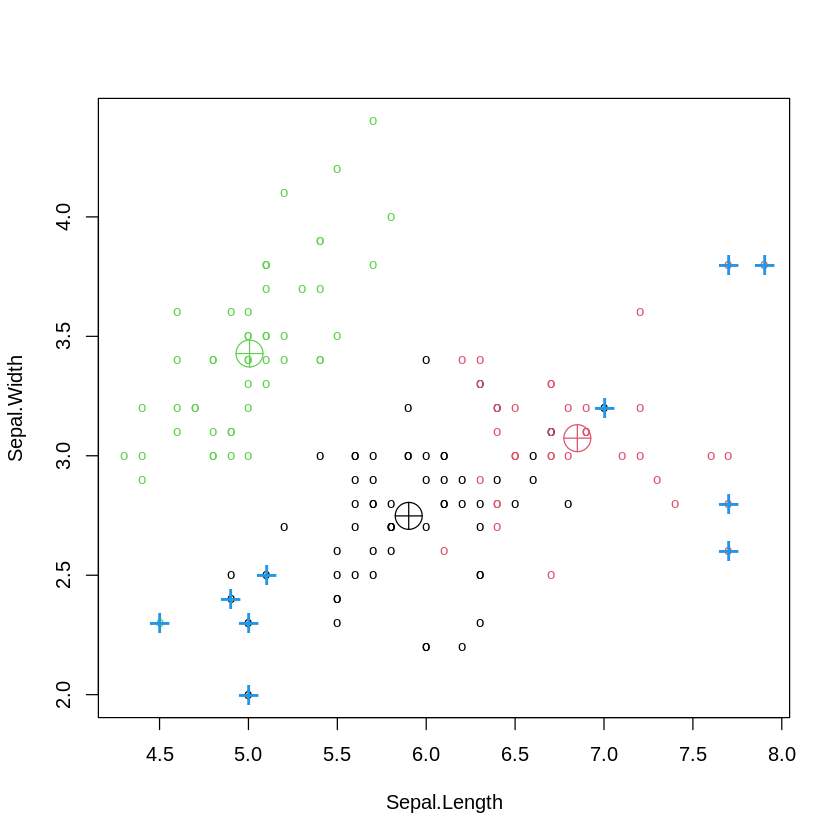

In [124]:
data(iris)
iris3 <- iris[,1:4]
kmeans.result <- kmeans(iris3, centers=3)
# cluster centers
kmeans.result$centers
kmeans.result$cluster
centers <- kmeans.result$centers[kmeans.result$cluster, ]
distances <- sqrt(rowSums((iris3 - centers)^2))
# pick top 10 largest distances
outliers <- order(distances, decreasing=T)[1:10]
# who are outliers
print(outliers)
print(iris3[outliers,])

plot(iris3[,c("Sepal.Length", "Sepal.Width")], pch="o", 
     col=kmeans.result$cluster, cex=0.75)
# plot cluster centers
points(kmeans.result$centers[,c("Sepal.Length", "Sepal.Width")], col=1:3, 
       pch=10, cex=3)
# plot outliers
points(iris3[outliers, c("Sepal.Length", "Sepal.Width")], pch="+", col=4, cex=2)

In [125]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
